In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
data = pd.read_csv("housing.csv")

In [218]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [220]:
data.dropna(inplace = True) #takes data and drops the null values

In [221]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [223]:
train_data = X_train.join(y_train)

In [224]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13621,-117.25,34.11,32.0,2910.0,641.0,2011.0,614.0,2.7473,INLAND,70800.0
7016,-118.08,33.97,36.0,1678.0,323.0,1380.0,352.0,3.5481,<1H OCEAN,163300.0
6081,-117.87,34.10,25.0,2208.0,477.0,1084.0,424.0,3.7750,<1H OCEAN,191700.0
12428,-116.21,33.68,34.0,584.0,176.0,625.0,166.0,1.5809,INLAND,100000.0
1470,-121.98,37.95,16.0,2984.0,406.0,1317.0,397.0,6.7821,INLAND,265900.0
...,...,...,...,...,...,...,...,...,...,...
7260,-118.18,34.01,39.0,322.0,82.0,319.0,90.0,2.6364,<1H OCEAN,148800.0
5782,-118.24,34.15,20.0,2734.0,658.0,1562.0,607.0,3.3906,<1H OCEAN,284100.0
16302,-121.35,38.00,22.0,3564.0,730.0,1539.0,699.0,3.6750,INLAND,152400.0
6664,-118.13,34.16,52.0,1787.0,427.0,1107.0,410.0,2.5664,<1H OCEAN,215000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

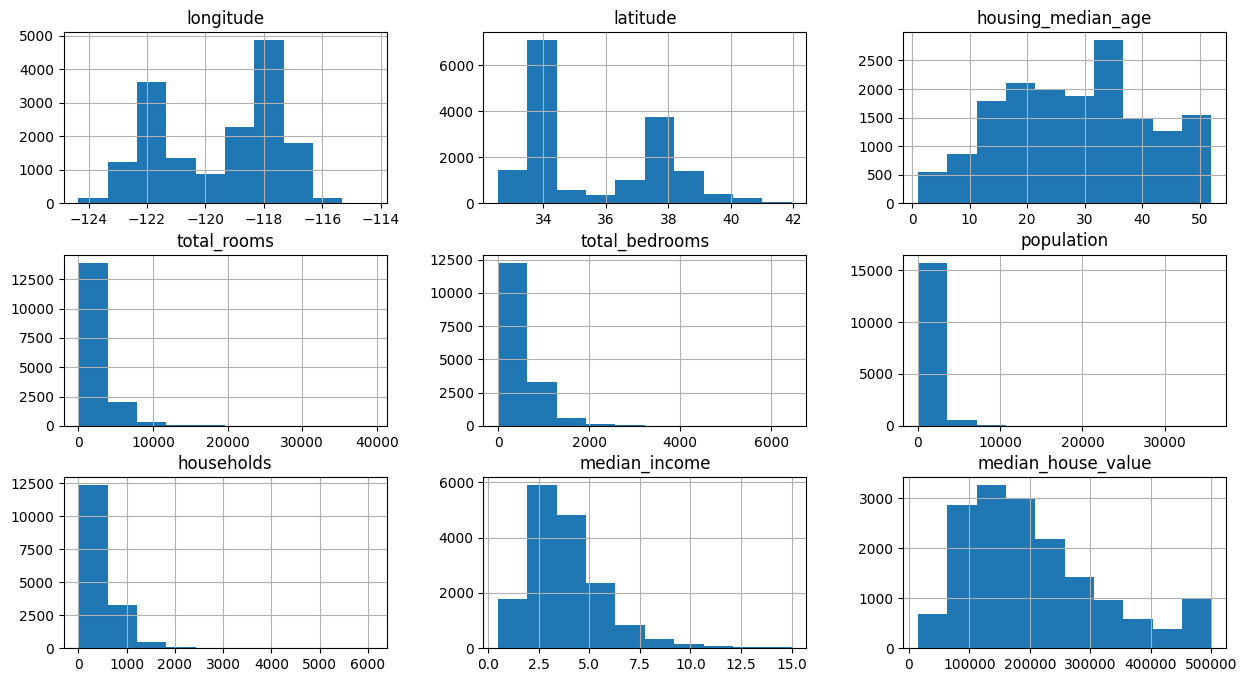

In [225]:
train_data.hist(figsize = (15, 8))

<Axes: >

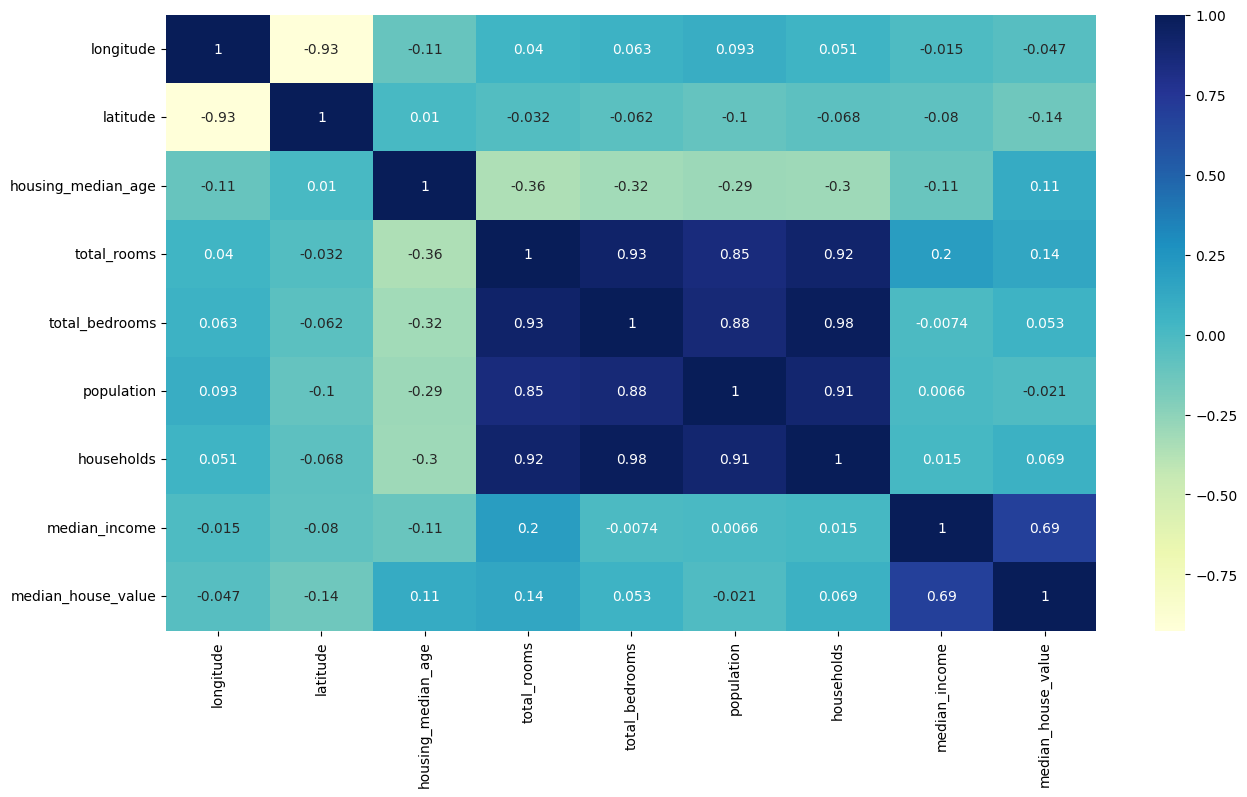

In [226]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

In [227]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

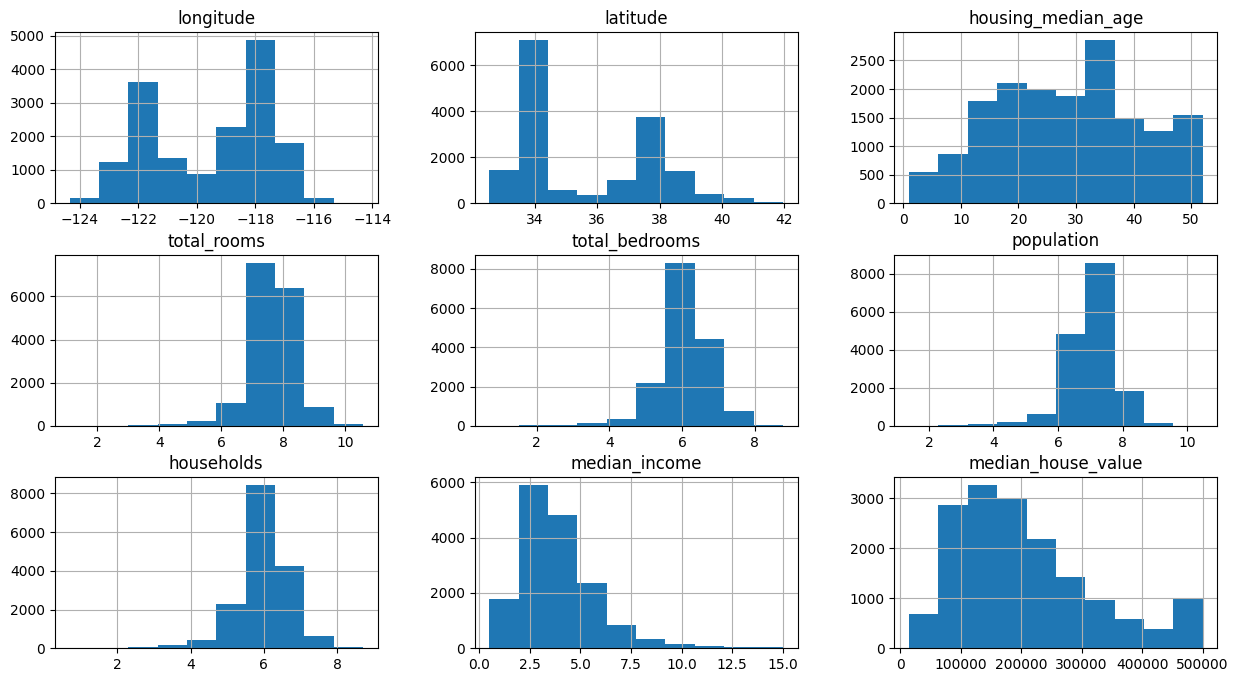

In [228]:
train_data.hist(figsize = (15, 8))

In [229]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [230]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13621,-117.25,34.11,32.0,7.976252,6.464588,7.606885,6.421622,2.7473,70800.0,False,True,False,False,False
7016,-118.08,33.97,36.0,7.425954,5.780744,7.230563,5.866468,3.5481,163300.0,True,False,False,False,False
6081,-117.87,34.10,25.0,7.700295,6.169611,6.989335,6.052089,3.7750,191700.0,True,False,False,False,False
12428,-116.21,33.68,34.0,6.371612,5.176150,6.439350,5.117994,1.5809,100000.0,False,True,False,False,False
1470,-121.98,37.95,16.0,8.001355,6.008813,7.183871,5.986452,6.7821,265900.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,-118.18,34.01,39.0,5.777652,4.418841,5.768321,4.510860,2.6364,148800.0,True,False,False,False,False
5782,-118.24,34.15,20.0,7.913887,6.490724,7.354362,6.410175,3.3906,284100.0,True,False,False,False,False
16302,-121.35,38.00,22.0,8.178919,6.594413,7.339538,6.551080,3.6750,152400.0,False,True,False,False,False
6664,-118.13,34.16,52.0,7.488853,6.059123,7.010312,6.018593,2.5664,215000.0,True,False,False,False,False


<Axes: >

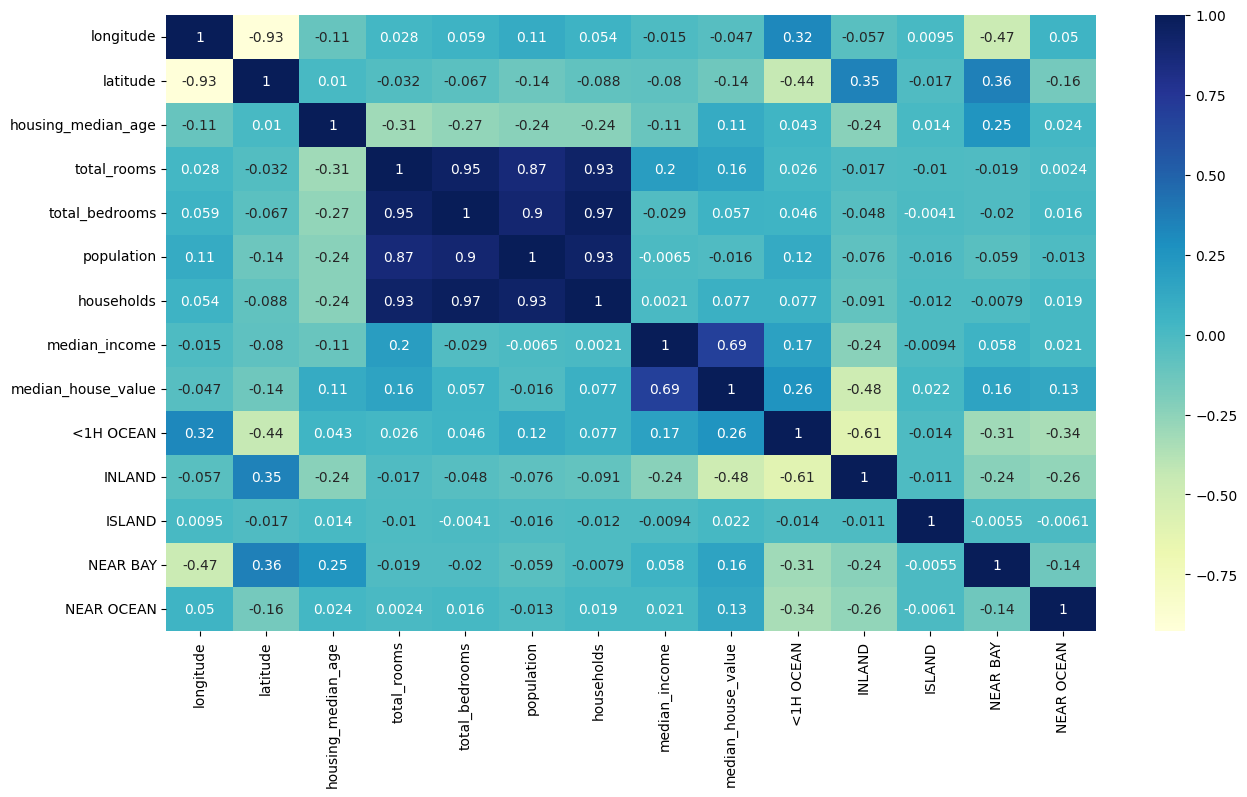

In [231]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

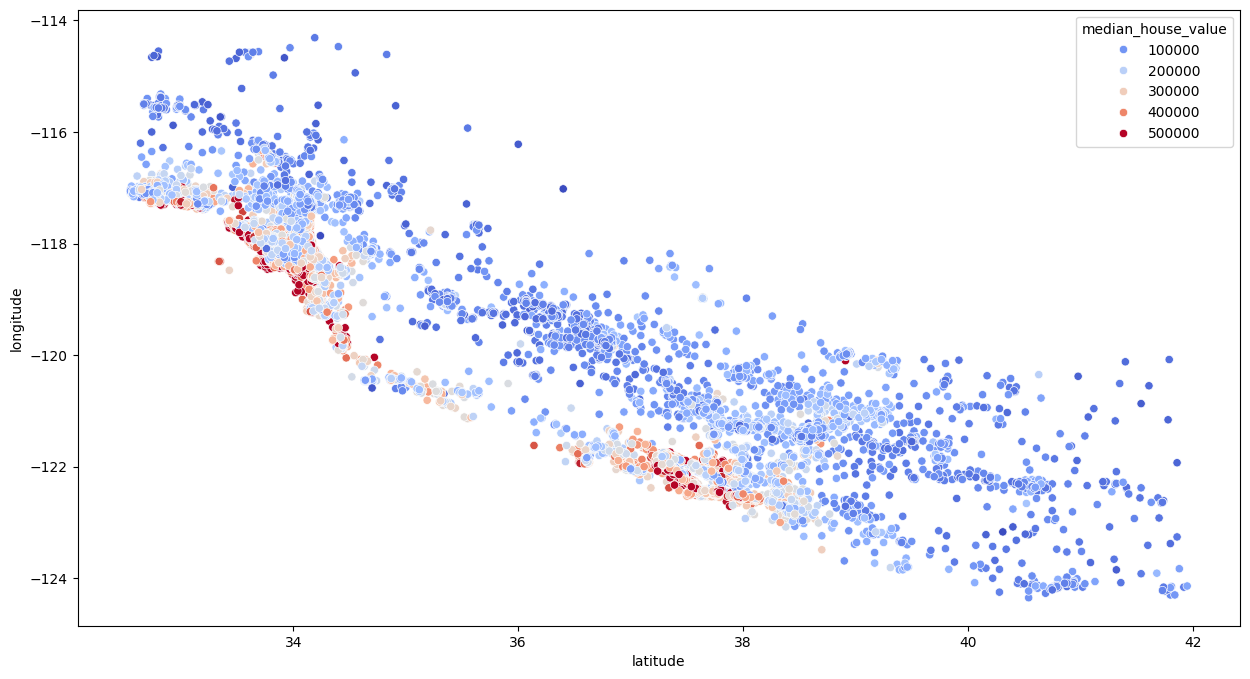

In [232]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

<Axes: >

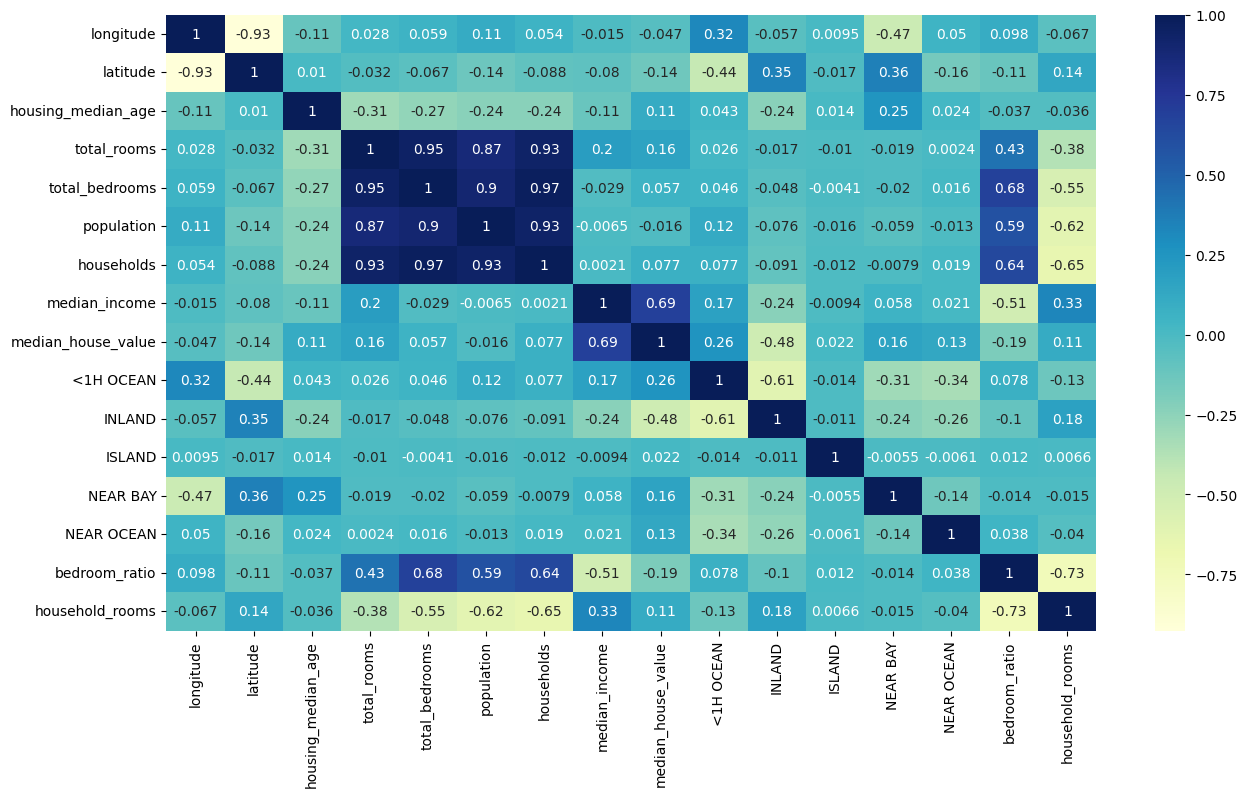

In [233]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [235]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [236]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [237]:
X_test_s = scaler.transform(X_test)

In [238]:
reg.score(X_test_s, y_test)

0.6782538595843886

In [239]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [240]:
forest.score(X_test_s, y_test)

0.8151904614168672

In [252]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                            scoring = "neg_mean_squared_error",
                            return_train_score = True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [253]:
best_forest = grid_search.best_estimator_

In [254]:
best_forest.score(X_test_s, y_test)

0.745901621855397

In [255]:
RandomForestRegressor(n_estimators = 200)

RandomForestRegressor(n_estimators=200)

In [256]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.745901621855397